## Task 8: Fake News Prediction

In this notebook, we will use **Logistic Regression** to predict whether a news article is real or fake. 
The dataset contains columns for Title, Text, and a Label (Fake or Real).




In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_csv('news.csv')

# Display the data
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
# Data preprocessing
# Drop any missing values
df = df.dropna()

# Combine title and text for better feature extraction
df['content'] = df['title'] + ' ' + df['text']

In [4]:
# Convert text to numerical features using TF-IDF
# TF-IDF converts text data into numerical format that machine learning models can understand
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['content'])
y = df['label']  # Target variable (Fake or Real)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the Logistic Regression model
# Using balanced class weights to handle potential class imbalance
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)


In [8]:
# Print results
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(cm)

Model Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       628
        REAL       0.92      0.90      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267


Confusion Matrix:
[[580  48]
 [ 61 578]]


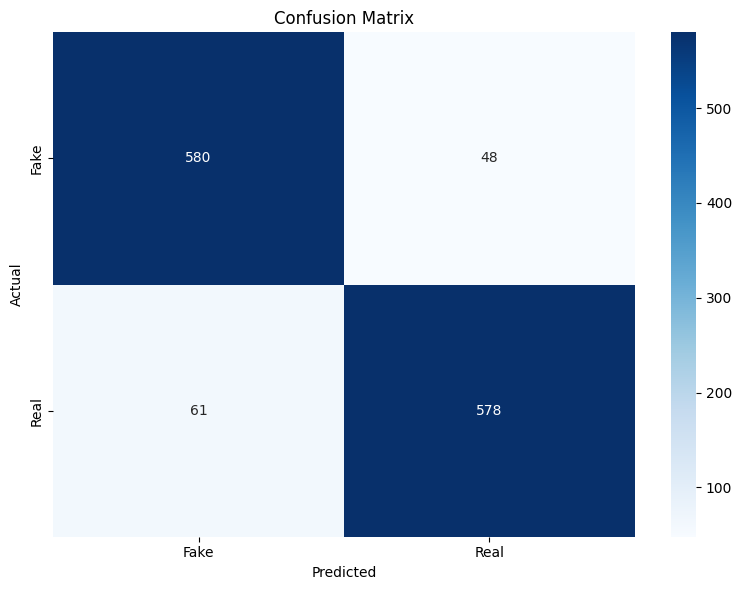

In [9]:
# Visualize confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Fake', 'Real'])
plt.yticks([0.5, 1.5], ['Fake', 'Real'])
plt.tight_layout()
plt.show()


The matrix shows that the model correctly classified 580 articles as **Fake** (true positives) and 578 articles as **Real** (true negatives).

The model incorrectly classified 48 articles as **Real** when they were actually **Fake** (false negatives) and 61 articles as **Fake** when they were actually **Real** (false positives).






.

In [10]:
# Feature importance analysis

# Get the most important words for classification
feature_names = tfidf.get_feature_names_out()
importance = model.coef_[0]
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': abs(importance)})
feature_importance = feature_importance.sort_values('importance', ascending=False)


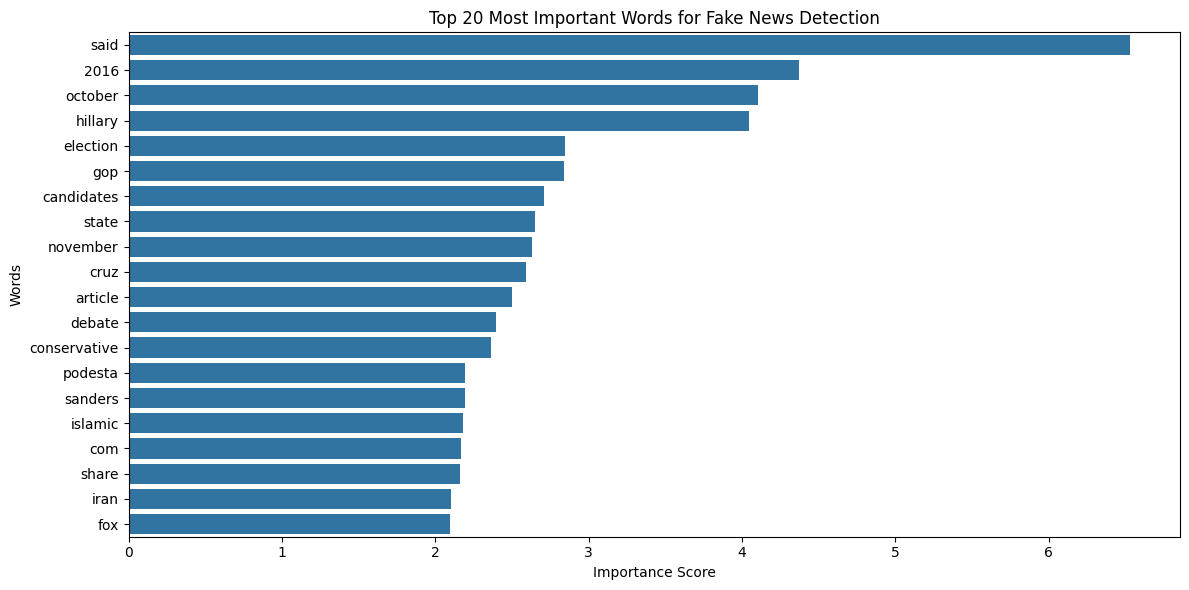

In [11]:
# Visualize top 20 most important features
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(20), x='importance', y='feature')
plt.title('Top 20 Most Important Words for Fake News Detection')
plt.xlabel('Importance Score')
plt.ylabel('Words')
plt.tight_layout()
plt.show()

In [12]:
# Function to predict if a news article is fake or real
def predict_news(title, text):
    """
    Predict if a news article is fake or real
    
    Parameters:
    title (str): The title of the news article
    text (str): The content of the news article
    
    Returns:
    str: 'Fake' or 'Real' prediction
    float: Probability of the prediction
    """
    # Combine title and text
    content = title + ' ' + text
    
    # Transform the text using the same TF-IDF vectorizer
    content_transformed = tfidf.transform([content])
    
    # Make prediction
    prediction = model.predict(content_transformed)[0]
    probability = max(model.predict_proba(content_transformed)[0])
    
    return prediction, probability

In [13]:
# Example usage of the prediction function
example_title = "Sample news title"
example_text = "Sample news content"
prediction, probability = predict_news(example_title, example_text)
print(f"\nExample Prediction:")
print(f"Prediction: {prediction}")
print(f"Confidence: {probability:.2f}")


Example Prediction:
Prediction: FAKE
Confidence: 0.70
